In [40]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [41]:
def loaddata():
    X = np.load("ex7_X.npy")
    return X

In [42]:
X=loaddata()

### find the closest centroids

$$c^{(i)} := j \quad \mathrm{that \; minimizes} \quad ||x^{(i)} - \mu_j||^2,$$

In [43]:
np.linalg.norm(-56)

56.0

In [71]:
X.shape

(300, 2)

In [44]:
def close_centroids(X,centroids):
    K=centroids.shape[0] # setting k
    idx=np.zeros(X.shape[0],dtype=int)
    for i in range(X.shape[0]):
        distance=[]
        for j in range(K):
            norm_ij=np.linalg.norm(X[i]-centroids[j])
            distance.append(norm_ij)
        idx[i]=np.argmin(distance)
    return idx

In [45]:
initial_centroids = np.array([[3,3], [6,2], [8,5]])
idx = close_centroids(X, initial_centroids)

print("First three elements in idx are:", idx[:])

First three elements in idx are: [0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 2 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2
 1 1 1 0]


### computing centroid means

$$\mu_k = \frac{1}{|C_k|} \sum_{i \in C_k} x^{(i)}$$ 

In [46]:
def compute_centroids(X,idx,K):
    m,n=X.shape
    centroids = np.zeros((K, n))  # xy value for the clusters
    for k in range(K):
        points=X[idx==k]
        centroids[k]=np.mean(points,axis=0)
    return centroids

In [47]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


### k-means on a dataset

In [48]:
def load_data():
    X = np.load("ex7_X.npy")
    return X

def draw_line(p1, p2, style="-k", linewidth=1):
    plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

def plot_data_points(X, idx):
    # plots data points in X, coloring them so that those with the same
    # index assignments in idx have the same color
    plt.scatter(X[:, 0], X[:, 1], c=idx)
    
def plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i):
    # Plot the examples
    plot_data_points(X, idx)
    
    # Plot the centroids as black 'x's
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='k', linewidths=3)
    
    # Plot history of the centroids with lines
    for j in range(centroids.shape[0]):
        draw_line(centroids[j, :], previous_centroids[j, :])
    
    plt.title("Iteration number %d" %i)

In [49]:
def k_means(X,initial_centroids,max_itter=10,plot_progress=False):
    m,n=X.shape
    K=initial_centroids.shape[0]
    centroids=initial_centroids
    previous_centroids=centroids
    idx=np.zeros(m)
    
    for i in range(max_itter):
        print("K_means itteration %d/%d"% (i,max_itter-1))
        idx=close_centroids(X,centroids)

        if plot_progress:
             plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
             previous_centroids=centroids
        
        centroids=compute_centroids(X,idx,K)
    
    plt.show()
    return centroids,idx


K_means itteration 0/9
K_means itteration 1/9
K_means itteration 2/9
K_means itteration 3/9
K_means itteration 4/9
K_means itteration 5/9
K_means itteration 6/9
K_means itteration 7/9
K_means itteration 8/9
K_means itteration 9/9


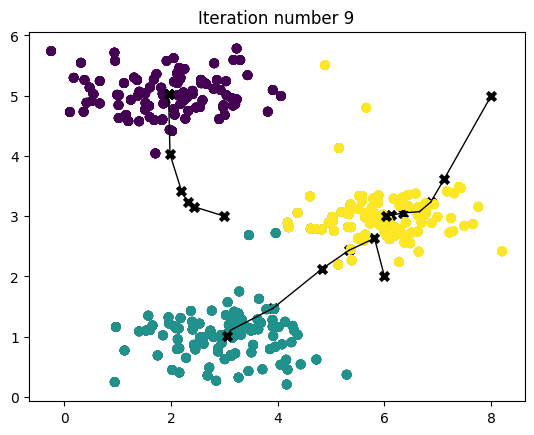

In [50]:
X=load_data()
initial_centroids=np.array([[3,3],[6,2],[8,5]])
k=3

max_iters=10

centroids,idx=k_means(X,initial_centroids,max_iters,plot_progress=True)

### random initialization

In [51]:
def K_means_init_centroid(X,K):
    randidx=np.random.permutation(X.shape[0])

    centroids=X[randidx[:K]]

    return centroids


##  Image compression with K-means

In this exercise, you will apply K-means to image compression. 

* In a straightforward 24-bit color representation of an image$^{2}$, each pixel is represented as three 8-bit unsigned integers (ranging from 0 to 255) that specify the red, green and blue intensity values. This encoding is often refered to as the RGB encoding.
* Our image contains thousands of colors, and in this part of the exercise, you will reduce the number of
colors to 16 colors.
* By making this reduction, it is possible to represent (compress) the photo in an efficient way. 
* Specifically, you only need to store the RGB values of the 16 selected colors, and for each pixel in the image you now need to only store the index of the color at that location (where only 4 bits are necessary to represent 16 possibilities).

In this part, you will use the K-means algorithm to select the 16 colors that will be used to represent the compressed image.
* Concretely, you will treat every pixel in the original image as a data example and use the K-means algorithm to find the 16 colors that best group (cluster) the pixels in the 3- dimensional RGB space. 
* Once you have computed the cluster centroids on the image, you will then use the 16 colors to replace the pixels in the original image.

<img src="figure 2.png" width="500" height="500">





**Load image**

First, you will use `matplotlib` to read in the original image, as shown below.

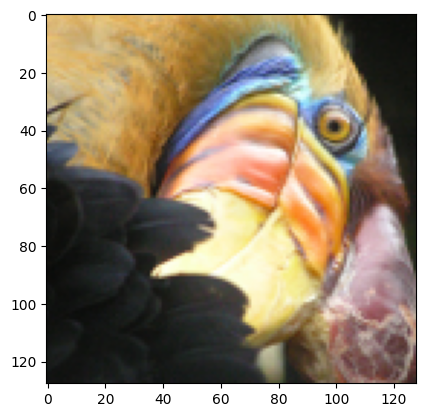

In [52]:
original_img=plt.imread('bird_small.png')
plt.imshow(original_img)

In [53]:
original_img.shape

(128, 128, 3)

As you can see, this creates a three-dimensional matrix `original_img` where 
* the first two indices identify a pixel position, and
* the third index represents red, green, or blue. 

For example, `original_img[50, 33, 2]` gives the blue intensity of the pixel at row 50 and column 33.

#### Processing data

To call the `run_kMeans`, you need to first transform the matrix `original_img` into a two-dimensional matrix.

* The code below reshapes the matrix `original_img` to create an $m \times 3$ matrix of pixel colors (where
$m=16384 = 128\times128$)

In [54]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))

In [67]:
X_img.shape

(16384, 3)

### k-means on image pixels

In [56]:
K=16
max_iters=10
initial_centroids=K_means_init_centroid(X_img,K)
centroids,idx=k_means(X_img,initial_centroids,max_iters)

K_means itteration 0/9
K_means itteration 1/9
K_means itteration 2/9
K_means itteration 3/9
K_means itteration 4/9
K_means itteration 5/9
K_means itteration 6/9
K_means itteration 7/9
K_means itteration 8/9
K_means itteration 9/9


In [57]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [ 3 13 13 13  3]


In [58]:
# Represent image in terms of indices
X_recovered = centroids[idx, :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

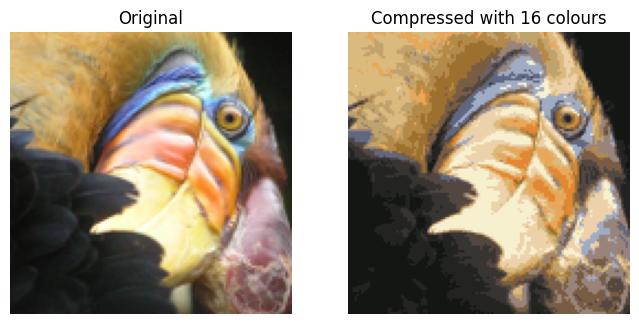

In [69]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()